# Section 0 问题描述与完成项目流程

## 1. 问题描述


<img src="default.png" width="20%"></img>

在该项目中，你将使用强化学习算法，实现一个自动走迷宫机器人。

1. 如上图所示，智能机器人显示在右上角。在我们的迷宫中，有陷阱（红色炸弹）及终点（蓝色的目标点）两种情景。机器人要尽量避开陷阱、尽快到达目的地。
2. 小车可执行的动作包括：向上走 `u`、向右走 `r`、向下走 `d`、向左走 `l`。
3. 执行不同的动作后，根据不同的情况会获得不同的奖励，具体而言，有以下几种情况。
    - 撞到墙壁：-10
    - 走到终点：50
    - 走到陷阱：-30
    - 其余情况：-0.1
4. 我们需要通过修改 `robot.py` 中的代码，来实现一个 Q Learning 机器人，实现上述的目标。

## 2. 完成项目流程

1. 配置环境，使用 `envirnment.yml` 文件配置名为 `robot-env` 的 conda 环境，具体而言，你只需转到当前的目录，在命令行/终端中运行如下代码，稍作等待即可。
```
conda-env create -f envirnment.yml
```
安装完毕后，在命令行/终端中运行 `source activate robot-env`（Mac/Linux 系统）或 `activate robot-env`（Windows 系统）激活该环境。

2. 阅读 `main.ipynb` 中的指导完成项目，并根据指导修改对应的代码，生成、观察结果。
3. 导出代码与报告，上传文件，提交审阅并优化。
---

---

# Section 1 算法理解


## 1. 1 强化学习总览

强化学习作为机器学习算法的一种，其模式也是让智能体在“训练”中学到“经验”，以实现给定的任务。但不同于监督学习与非监督学习，在强化学习的框架中，我们更侧重通过智能体与环境的**交互**来学习。通常在监督学习和非监督学习任务中，智能体往往需要通过给定的训练集，辅之以既定的训练目标（如最小化损失函数），通过给定的学习算法来实现这一目标。然而在强化学习中，智能体则是通过其与环境交互得到的奖励进行学习。这个环境可以是虚拟的（如虚拟的迷宫），也可以是真实的（自动驾驶汽车在真实道路上收集数据）。


在强化学习中有五个核心组成部分，它们分别是：**环境（Environment）**、**智能体（Agent）**、**状态（State）**、**动作（Action）**和**奖励（Reward）**。在某一时间节点 $t$：
    
- 智能体在从环境中感知其所处的状态 $s_t$
- 智能体根据某些准则选择动作 $a_t$
- 环境根据智能体选择的动作，向智能体反馈奖励 $r_{t+1}$

通过合理的学习算法，智能体将在这样的问题设置下，成功学到一个在状态 $s_t$ 选择动作 $a_t$ 的策略 $\pi (s_t) = a_t$。

---

**问题 1**：请参照如上的定义，描述出 “机器人走迷宫这个问题” 中强化学习五个组成部分对应的实际对象：

- **环境** : 迷宫，迷宫里面有墙壁、陷阱和终点
- **状态** : 状态就是描述机器人当前情况的一个抽象概念，它与机器人能否成功学到一个策略息息相关，状态是小车所处的迷宫坐标位置，例如 (0,1)、(1,1) 等。


- **动作** : 向上走 u、向右走 r、向下走 d、向左走 l
- **奖励** : 撞到墙壁：-10，走到终点：50，走到陷阱：-30，其余情况：-0.1

$$T(s^{'}, a, s) = P(s^{'}|a,s)$$


---

## 1.2 计算 Q 值 

在我们的项目中，我们要实现基于 Q-Learning 的强化学习算法。Q-Learning 是一个值迭代（Value Iteration）算法。与策略迭代（Policy Iteration）算法不同，值迭代算法会计算每个”状态“或是”状态-动作“的值（Value）或是效用（Utility），然后在执行动作的时候，会设法最大化这个值。因此，对每个状态值的准确估计，是我们值迭代算法的核心。通常我们会考虑**最大化动作的长期奖励**，即不仅考虑当前动作带来的奖励，还会考虑动作长远的奖励。

在 Q-Learning 算法中，我们把这个长期奖励记为 Q 值，我们会考虑每个 ”状态-动作“ 的 Q 值，具体而言，它的计算公式为：

$$
q(s_{t},a) = R_{t+1} + \gamma \times\max_a q(a,s_{t+1})
$$

也就是对于当前的“状态-动作” $(s_{t},a)$，我们考虑执行动作 $a$ 后环境给我们的奖励 $R_{t+1}$，以及执行动作 $a$ 到达 $s_{t+1}$后，执行任意动作能够获得的最大的Q值 $\max_a q(a,s_{t+1})$，$\gamma$ 为折扣因子。

不过一般地，我们使用更为保守地更新 Q 表的方法，即引入松弛变量 $alpha$，按如下的公式进行更新，使得 Q 表的迭代变化更为平缓。

$$
q(s_{t},a) = (1-\alpha) \times q(s_{t},a) + \alpha \times(R_{t+1} + \gamma \times\max_a q(a,s_{t+1}))
$$



---
<img src="default2.png" width="20%"></img>

**问题 2**：根据已知条件求 $q(s_{t},a)$，在如下模板代码中的空格填入对应的数字即可。


已知：如上图，机器人位于 $s_1$，行动为 `u`，行动获得的奖励与题目的默认设置相同。在 $s_2$ 中执行各动作的 Q 值为：`u`: -24，`r`: -13，`d`: -0.29、`l`: +40，$\gamma$ 取0.9。


$$
\begin{align}
q(s_{t},a) & = R_{t+1} + \gamma \times\max_a q(a,s_{t+1}) \\
 & =(-0.1) + (0.9)*(40) \\
 & =(35.9)
\end{align}
$$


---

## 1.3 如何选择动作

在强化学习中，「探索-利用」问题是非常重要的问题。具体来说，根据上面的定义，我们会尽可能地让机器人在每次选择最优的决策，来最大化长期奖励。但是这样做有如下的弊端：
1. 在初步的学习中，我们的 Q 值会不准确，如果在这个时候都按照 Q 值来选择，那么会造成错误。
2. 学习一段时间后，机器人的路线会相对固定，则机器人无法对环境进行有效的探索。

因此我们需要一种办法，来解决如上的问题，增加机器人的探索。由此我们考虑使用 epsilon-greedy 算法，即在小车选择动作的时候，以一部分的概率随机选择动作，以一部分的概率按照最优的 Q 值选择动作。同时，这个选择随机动作的概率应当随着训练的过程逐步减小。

---

**问题 3**：在如下的代码块中，实现 epsilon-greedy 算法的逻辑，并运行测试代码。

In [217]:
import random

actions = ['u','r','d','l']
qline = {'u':1.2, 'r':-2.1, 'd':-24.5, 'l':27}
epsilon = 0.3 # 以0.3的概率进行随机选择

def choose_action(epsilon):
    action = None
    if random.uniform(0.,1.) <= epsilon: # 以某一概率
        action = random.choice(actions) # 随机选择
    else: 
        action = max(qline, key=lambda k: qline[k]) # 否则选择具有最大 Q 值的动作
    return action

In [218]:
res = ''
for i in range(50):
    res += choose_action(epsilon)
print(res)

lllurllrlulllllrluullllllllrlllllrldllllllllllldlu


---

---

# Section 2 代码实现

## 2.1. `Maze` 类理解

我们首先引入了迷宫类 `Maze`，这是一个非常强大的函数，它能够根据你的要求随机创建一个迷宫，或者根据指定的文件，读入一个迷宫地图信息。

1. 使用 `Maze("file_name")` 根据指定文件创建迷宫，或者使用 `Maze(maze_size=(height,width))` 来随机生成一个迷宫。
2. 使用 `trap_number` 参数，在创建迷宫的时候，设定迷宫中陷阱的数量。
3. 直接键入迷宫变量的名字按回车，展示迷宫图像（如 `g=Maze("xx.txt")`，那么直接输入 `g` 即可。
4. 建议生成的迷宫尺寸，长在 6~12 之间，宽在 10～12 之间。

---

**问题 4**：在如下的代码块中，创建你的迷宫并展示。

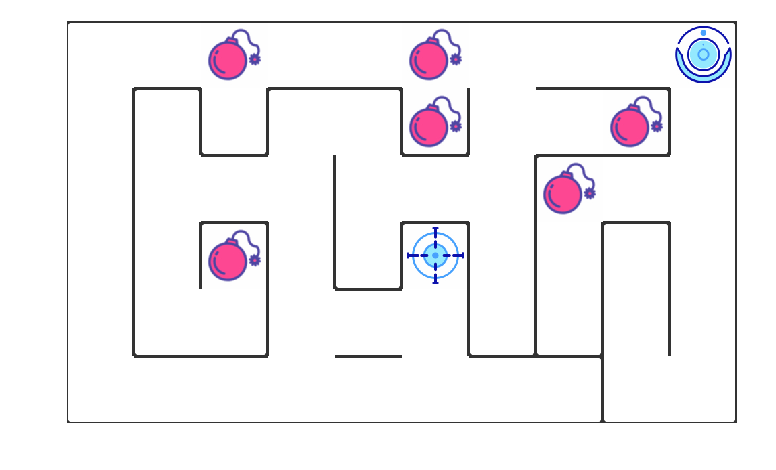

Maze of size (6, 10)

In [219]:
from Maze import Maze
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## todo: 创建迷宫并展示
g = Maze(maze_size=(6,10), trap_number=6)
g

---

你可能已经注意到，在迷宫中我们已经默认放置了一个机器人。实际上，我们为迷宫配置了相应的 API，来帮助机器人的移动与感知。其中你随后会使用的两个 API 为 `maze.sense_robot()` 及 `maze.move_robot()`。

1. `maze.sense_robot()` 为一个无参数的函数，输出机器人在迷宫中目前的位置。
2. `maze.move_robot(direction)` 对输入的移动方向，移动机器人，并返回对应动作的奖励值。

---

**问题 5**：随机移动机器人，并记录下获得的奖励，展示出机器人最后的位置。

(0, 9)


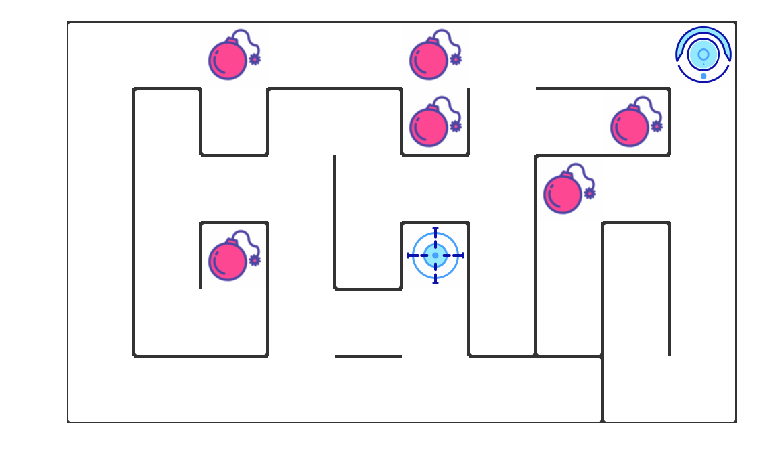

Maze of size (6, 10)

In [220]:
rewards = []

## 循环、随机移动机器人10次，记录下奖励
for i in range(10):
    g.move_robot(random.choice(actions))

## 输出机器人最后的位置
print(g.sense_robot())

## 打印迷宫，观察机器人位置
g

## 2.2. `Robot` 类实现

`Robot` 类是我们需要重点实现的部分。在这个类中，我们需要实现诸多功能，以使得我们成功实现一个强化学习智能体。总体来说，之前我们是人为地在环境中移动了机器人，但是现在通过实现 `Robot` 这个类，机器人将会自己移动。通过实现学习函数，`Robot` 类将会学习到如何选择最优的动作，并且更新强化学习中对应的参数。

首先 `Robot` 有多个输入，其中 `alpha=0.5, gamma=0.9, epsilon0=0.5` 表征强化学习相关的各个参数的默认值，这些在之前你已经了解到，`Maze` 应为机器人所在迷宫对象。

随后观察 `Robot.update` 函数，它指明了在每次执行动作时，`Robot` 需要执行的程序。按照这些程序，各个函数的功能也就明了了。

最后你需要实现 `Robot.py` 代码中的8段代码，他们都在代码中以 `#TODO` 进行标注，你能轻松地找到他们。

---

**问题 6**：实现 `Robot.py` 中的8段代码，并运行如下代码检查效果（记得将 `maze` 变量修改为你创建迷宫的变量名）。



('u', -10.0)


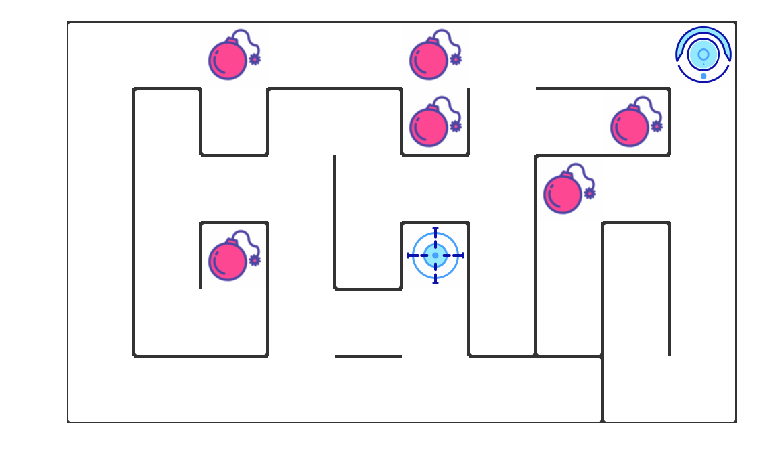

Maze of size (6, 10)

In [221]:
from Robot import Robot
robot = Robot(g) # 记得将 maze 变量修改为你创建迷宫的变量名
robot.set_status(learning=True,testing=False)
print(robot.update())

g

---

## 2.3 用 `Runner` 类训练 Robot

在实现了上述内容之后，我们就可以开始对我们 `Robot` 进行训练并调参了。我们为你准备了又一个非常棒的类 `Runner`，来实现整个训练过程及可视化。使用如下的代码，你可以成功对机器人进行训练。并且你会在当前文件夹中生成一个名为 `filename` 的视频，记录了整个训练的过程。通过观察该视频，你能够发现训练过程中的问题，并且优化你的代码及参数。

---

**问题 7**：尝试利用下列代码训练机器人，并进行调参。可选的参数包括：

- 训练参数
    - 训练次数 `epoch`
- 机器人参数：
    - `epsilon0` (epsilon 初值)
    - `epsilon`衰减（可以是线性、指数衰减，可以调整衰减的速度），你需要在 Robot.py 中调整
    - `alpha`
    - `gamma`
- 迷宫参数:
    - 迷宫大小
    - 迷宫中陷阱的数量

In [230]:
## 可选的参数：
epoch = 15

epsilon0 = [0.3, 0.5, 0.7]
alpha = [0.4, 0.5, 0.6]
gamma = [0.8, 0.9, 0.95]

maze_size = (6,10)
trap_number = 3


In [231]:
from Runner import Runner
import time
run_result = {}
for a_index in range(3):
    for e_index in range(3):
        for g_index in range(3):
            for _ in range(10):
                start_time = time.time()
                g = Maze(maze_size=maze_size,trap_number=trap_number)
                r = Robot(g,alpha=alpha[a_index], epsilon0=epsilon0[e_index], gamma=gamma[g_index])
                r.set_status(learning=True)
                runner = Runner(r, g)
                runner.run_training(epoch, display_direction=False)
                end_time = time.time()
                use_time = end_time - start_time
                if run_result.get('alpha={},epsilon0={},gamma={}'.format(str(alpha[a_index]),str(epsilon0[e_index]),str(gamma[g_index]))):
                    run_result['alpha={},epsilon0={},gamma={}'.format(str(alpha[a_index]),str(epsilon0[e_index]),str(gamma[g_index]))].append(use_time)
                else:
                    run_result['alpha={},epsilon0={},gamma={}'.format(str(alpha[a_index]),str(epsilon0[e_index]),str(gamma[g_index]))] = [use_time]

run_result
# runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。

{'alpha=0.4,epsilon0=0.3,gamma=0.8': [0.038184165954589844,
  0.0409698486328125,
  0.06638860702514648,
  0.044969797134399414,
  0.04611396789550781,
  0.03656411170959473,
  0.06282973289489746,
  0.033356428146362305,
  0.04032707214355469,
  0.034354209899902344],
 'alpha=0.4,epsilon0=0.3,gamma=0.9': [0.060774803161621094,
  0.04097294807434082,
  0.04270124435424805,
  0.06673645973205566,
  0.051485538482666016,
  0.07521867752075195,
  0.09226560592651367,
  0.05444741249084473,
  0.06476855278015137,
  0.043332576751708984],
 'alpha=0.4,epsilon0=0.3,gamma=0.95': [0.06716442108154297,
  0.04962635040283203,
  0.03820013999938965,
  0.03754901885986328,
  0.042632341384887695,
  0.06365704536437988,
  0.06281471252441406,
  0.06438922882080078,
  0.20730948448181152,
  0.06336474418640137],
 'alpha=0.4,epsilon0=0.5,gamma=0.8': [0.05131673812866211,
  0.03742551803588867,
  0.06353616714477539,
  0.034749507904052734,
  0.045142412185668945,
  0.04972720146179199,
  0.06380367279

In [232]:
import pandas as pd
df = pd.DataFrame(run_result)
df

,"alpha=0.4,epsilon0=0.3,gamma=0.8","alpha=0.4,epsilon0=0.3,gamma=0.9","alpha=0.4,epsilon0=0.3,gamma=0.95","alpha=0.4,epsilon0=0.5,gamma=0.8","alpha=0.4,epsilon0=0.5,gamma=0.9","alpha=0.4,epsilon0=0.5,gamma=0.95","alpha=0.4,epsilon0=0.7,gamma=0.8","alpha=0.4,epsilon0=0.7,gamma=0.9","alpha=0.4,epsilon0=0.7,gamma=0.95","alpha=0.5,epsilon0=0.3,gamma=0.8",...,"alpha=0.5,epsilon0=0.7,gamma=0.95","alpha=0.6,epsilon0=0.3,gamma=0.8","alpha=0.6,epsilon0=0.3,gamma=0.9","alpha=0.6,epsilon0=0.3,gamma=0.95","alpha=0.6,epsilon0=0.5,gamma=0.8","alpha=0.6,epsilon0=0.5,gamma=0.9","alpha=0.6,epsilon0=0.5,gamma=0.95","alpha=0.6,epsilon0=0.7,gamma=0.8","alpha=0.6,epsilon0=0.7,gamma=0.9","alpha=0.6,epsilon0=0.7,gamma=0.95"
0,0.038184,0.060775,0.067164,0.051317,0.037816,0.034760,0.056173,0.038701,0.036511,0.034245,...,0.038604,0.037377,0.049194,0.046607,0.244025,0.067613,0.040154,0.034404,0.031381,0.035225
1,0.040970,0.040973,0.049626,0.037426,0.043071,0.054113,0.060482,0.049470,0.035307,0.063616,...,0.035384,0.052989,0.038399,0.037157,0.043878,0.066264,0.046540,0.044667,0.066562,0.064921
2,0.066389,0.042701,0.038200,0.063536,0.040401,0.058365,0.065955,0.067383,0.029742,0.033742,...,0.232896,0.064578,0.064826,0.034006,0.042663,0.067430,0.043928,0.037740,0.066761,0.066674
3,0.044970,0.066736,0.037549,0.034750,0.066683,0.059491,0.043271,0.038171,0.037722,0.063053,...,0.061950,0.045748,0.047518,0.030369,0.049200,0.037510,0.034981,0.056536,0.035078,0.066246
4,0.046114,0.051486,0.042632,0.045142,0.040080,0.036785,0.065832,0.053688,0.060443,0.062772,...,0.033056,0.064979,0.037650,0.038313,0.064725,0.046506,0.037392,0.064869,0.044155,0.035970
5,0.036564,0.075219,0.063657,0.049727,0.035455,0.053145,0.258399,0.040607,0.037448,0.053831,...,0.064587,0.040544,0.039558,0.064736,0.057372,0.046290,0.044441,0.069552,0.066464,0.066308
6,0.062830,0.092266,0.062815,0.063804,0.049500,0.033704,0.050957,0.045502,0.034178,0.045270,...,0.066453,0.065098,0.047502,0.064935,0.042916,0.037846,0.067294,0.042898,0.041005,0.065972
7,0.033356,0.054447,0.064389,0.040120,0.036461,0.034206,0.039144,0.056443,0.064342,0.063685,...,0.036837,0.034744,0.041565,0.035960,0.035308,0.038968,0.072040,0.196324,0.068472,0.071444
8,0.040327,0.064769,0.207309,0.054254,0.040889,0.063090,0.036537,0.037256,0.063194,0.039701,...,0.037033,0.041898,0.035785,0.044474,0.042345,0.066107,0.053320,0.044881,0.041986,0.057128
9,0.034354,0.043333,0.063365,0.067278,0.064910,0.046771,0.055970,0.039763,0.041705,0.031507,...,0.064200,0.043143,0.041750,0.064183,0.039899,0.038376,0.033684,0.032131,0.035977,0.039806


In [233]:
import numpy as np
df.agg([np.mean, np.std]).sort_values(by=['mean', 'std'], axis=1)

,"alpha=0.5,epsilon0=0.3,gamma=0.95","alpha=0.4,epsilon0=0.7,gamma=0.95","alpha=0.6,epsilon0=0.3,gamma=0.9","alpha=0.4,epsilon0=0.3,gamma=0.8","alpha=0.5,epsilon0=0.7,gamma=0.8","alpha=0.4,epsilon0=0.5,gamma=0.9","alpha=0.6,epsilon0=0.3,gamma=0.95","alpha=0.5,epsilon0=0.7,gamma=0.9","alpha=0.4,epsilon0=0.7,gamma=0.9","alpha=0.6,epsilon0=0.5,gamma=0.95",...,"alpha=0.6,epsilon0=0.7,gamma=0.95","alpha=0.4,epsilon0=0.3,gamma=0.9","alpha=0.6,epsilon0=0.7,gamma=0.8","alpha=0.5,epsilon0=0.5,gamma=0.9","alpha=0.6,epsilon0=0.5,gamma=0.8","alpha=0.5,epsilon0=0.3,gamma=0.9","alpha=0.5,epsilon0=0.7,gamma=0.95","alpha=0.4,epsilon0=0.3,gamma=0.95","alpha=0.4,epsilon0=0.7,gamma=0.8","alpha=0.5,epsilon0=0.5,gamma=0.8"
mean,0.042470,0.044059,0.044375,0.044406,0.044952,0.045527,0.046074,0.046329,0.046698,0.047377,...,0.056969,0.059270,0.062400,0.065721,0.066233,0.067034,0.067100,0.069671,0.073272,0.095578
std,0.008293,0.013214,0.008523,0.011439,0.009538,0.011381,0.013618,0.011122,0.009954,0.013142,...,0.014258,0.016257,0.048691,0.065316,0.063070,0.070331,0.059932,0.049729,0.065869,0.177251


In [241]:
# alpha=0.6,epsilon0=0.5,gamma=0.9
## 可选的参数：
epoch = 15

epsilon0 = 0.3
alpha = 0.5
gamma = 0.95

maze_size = (6,10)
trap_number = 3

from Runner import Runner

g = Maze(maze_size=maze_size,trap_number=trap_number)
r = Robot(g,alpha=alpha, epsilon0=epsilon0, gamma=gamma)
r.set_status(learning=True)

runner = Runner(r, g)
runner.run_training(epoch, display_direction=True)
runner.generate_movie(filename = "final1.mp4") # 你可以注释该行代码，加快运行速度，不过你就无法观察到视频了。

Generate Movies: 100%|██████████| 594/594 [00:18<00:00, 31.91it/s]


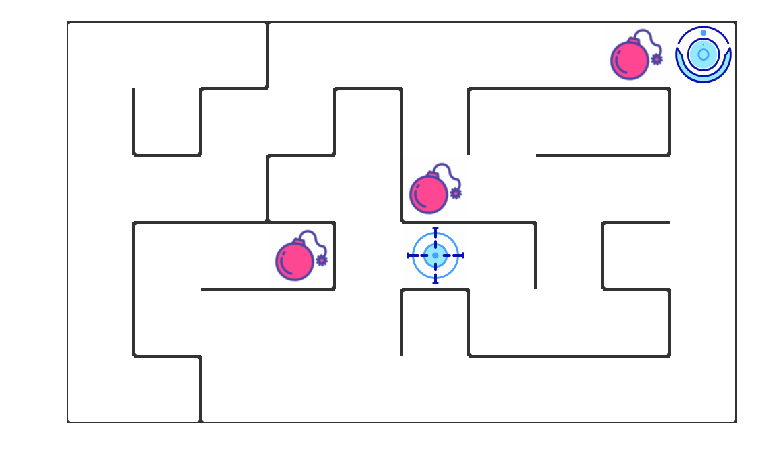

Maze of size (6, 10)

In [242]:
g

---

使用 `runner.plot_results()` 函数，能够打印机器人在训练过程中的一些参数信息。

- Success Times 代表机器人在训练过程中成功的累计次数，这应当是一个累积递增的图像。
- Accumulated Rewards 代表机器人在每次训练 epoch 中，获得的累积奖励的值，这应当是一个逐步递增的图像。
- Running Times per Epoch 代表在每次训练 epoch 中，小车训练的次数（到达终点就会停止该 epoch 转入下次训练），这应当是一个逐步递减的图像。

---

**问题 8**：使用 `runner.plot_results()` 输出训练结果，根据该结果对你的机器人进行分析。

- 指出你选用的参数如何，选用参数的原因。
- 建议你比较不同参数下机器人的训练的情况。
- 训练的结果是否满意，有何改进的计划。

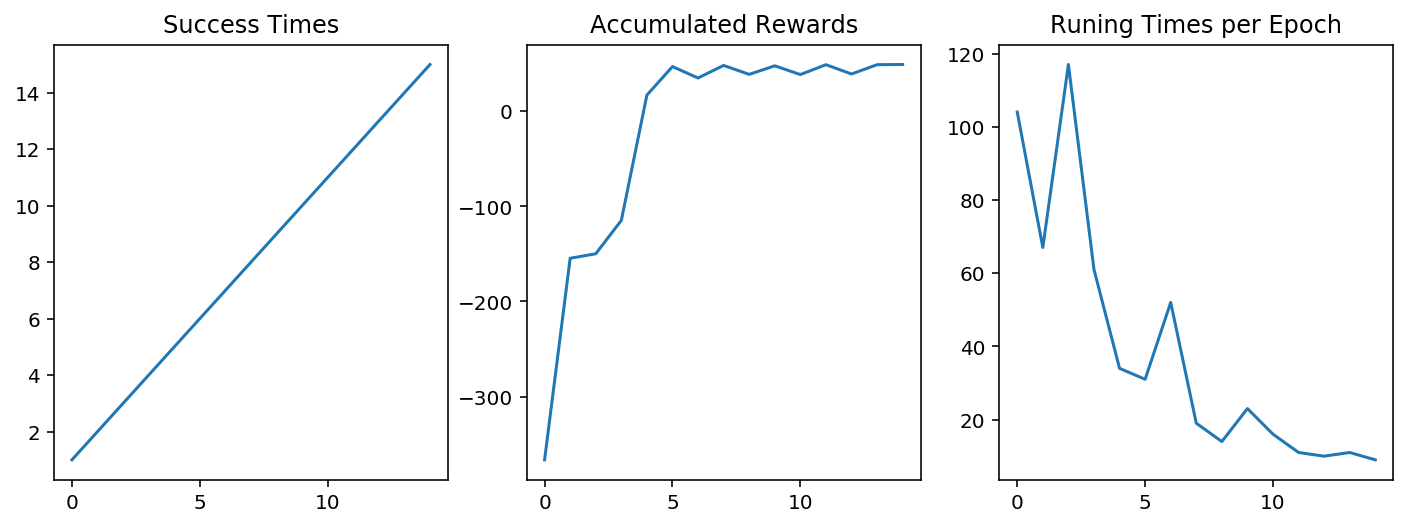

In [243]:
runner.plot_results()

(回答区)

 - 所选参数 epoch = 20，epsilon0 = 0.5，alpha = 0.6，gamma = 0.9，maze_size = (6,10)，trap_number = 1；epoch=5的时候就收敛了，所以增加epoch不会对学习效果产生大的提升，alpha、gamma、epsilon0表征强化学习相关的各个参数的默认值，maze_size一开始我设置的是(6, 6)，trap_number设置的是1，跑了两次发现都没有收敛，看了mp4文件才发现原来目标被陷阱堵住了，所以修改了maze_size为(6,10)，trap_number为1；epsilon0的值太大容易发散，值太小不能让学习到足够的状态；alpha的值太小不容易到达终点，会在较长时间里停留在历史结果中，值太大在前面几次可能会发生较大的波动；gamma的值太小收敛速度比较慢。对训练结果基本满意，计划改进epoch次数，从判断是否收敛之后来决定是否再进行几轮学习，earlystopping可以有效的减少无谓的训练次数。

---

**问题 9：** 请将如下的文件打包，提交文件给审阅者。

- `robot.py`
- `robot_maze.ipynb`
- 由 `robot_maze.ipynb` 导出的 `robot_maze.html`